In [9]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

In [16]:

df_users= pd.read_csv('tags.csv')

df_ratings= pd.read_csv('ratings.csv')


df_movies= pd.read_csv('movies.csv')

In [18]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [19]:
df_users.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [20]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [21]:
ratings_train, ratings_test = train_test_split(df_ratings, test_size=0.2, random_state=42)

In [22]:
ratings_train.shape, ratings_test.shape

((80668, 4), (20168, 4))

In [24]:
unique_users= df_users.userId.unique().shape[0]
unique_users

58

In [26]:
unique_movies= df_movies.movieId.unique().shape[0]
unique_movies

9742

In [27]:
from scipy.sparse import csr_matrix

In [29]:
user_movies_data= df_ratings.pivot(index='movieId', columns='userId', values='rating').fillna(0)
user_movies_data

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
genre_dummies = df_movies['genres'].str.get_dummies(sep='|')
df_movies = pd.concat([df_movies, genre_dummies], axis=1)
df_movies

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df_movies['metadata']= ""

In [33]:
df_movies.Action, type(df_movies.Action)

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 9737    1
 9738    0
 9739    0
 9740    1
 9741    0
 Name: Action, Length: 9742, dtype: int64,
 pandas.core.series.Series)

In [34]:
def metadata_Action(x):
    if x == 1:
        return "Action"
    else:
        return " "

In [35]:
df_movies['metadata_Action'] = df_movies.Action.apply(metadata_Action)

In [36]:
def metadata_Adventure(x):
    if x == 1:
        return " Adventure "
    else:
        return " "

df_movies['metadata_Adventure'] = df_movies.Adventure.apply(metadata_Adventure)

In [37]:
def metadata_Animation(x):
    if x == 1:
        return " Animation "
    else:
        return " "
df_movies['metadata_Animation'] = df_movies.Animation.apply(metadata_Animation)

In [40]:
def metadata_Childrens(x):
    if x == 1:
        return " Children's "
    else:
        return " "

df_movies["metadata_Children's"] = df_movies["Children"].apply(metadata_Childrens)

In [39]:
df_movies.columns

Index(['movieId', 'title', 'genres', '(no genres listed)', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'metadata',
       'metadata_Action', 'metadata_Adventure', 'metadata_Animation'],
      dtype='object')

In [41]:
def metadata_Comedy(x):
    if x == 1:
        return " Comedy "
    else:
        return " "

df_movies['metadata_Comedy'] = df_movies.Comedy.apply(metadata_Comedy)

In [42]:
def metadata_Crime(x):
    if x == 1:
        return " Crime "
    else:
        return " "

df_movies['metadata_Crime'] = df_movies.Crime.apply(metadata_Crime)

In [43]:
def metadata_Documentary(x):
    if x == 1:
        return " Documentary "
    else:
        return " "

df_movies['metadata_Documentary'] = df_movies.Documentary.apply(metadata_Documentary)

In [44]:
def metadata_Drama(x):
    if x == 1:
        return " Drama "
    else:
        return " "

df_movies['metadata_Drama'] = df_movies.Drama.apply(metadata_Drama)

In [45]:
def metadata_Fantasy(x):
    if x == 1:
        return " Fantasy "
    else:
        return " "

df_movies['metadata_Fantasy'] = df_movies.Fantasy.apply(metadata_Fantasy)

In [46]:
def metadata_FilmNoir(x):
    if x == 1:
        return " Film-Noir "
    else:
        return " "

df_movies['metadata_Film-Noir'] = df_movies["Film-Noir"].apply(metadata_FilmNoir)

In [47]:
def metadata_Horror(x):
    if x == 1:
        return "Horror "
    else:
        return " "

df_movies['metadata_Horror'] = df_movies.Horror.apply(metadata_Horror)

In [48]:
def metadata_Musical(x):
    if x == 1:
        return " Musical "
    else:
        return " "

df_movies['metadata_Musical'] = df_movies.Musical.apply(metadata_Musical)

In [49]:
def metadata_Mystery(x):
    if x == 1:
        return " Mystery "
    else:
        return " "

df_movies['metadata_Mystery'] = df_movies.Mystery.apply(metadata_Mystery)

In [50]:
def metadata_Romance(x):
    if x == 1:
        return " Romance "
    else:
        return " "

df_movies['metadata_Romance'] = df_movies.Romance.apply(metadata_Romance)

In [51]:
def metadata_SciFi(x):
    if x == 1:
        return " Sci-Fi "
    else:
        return " "

df_movies['metadata_Sci-Fi'] = df_movies["Sci-Fi"].apply(metadata_SciFi)

In [52]:
def metadata_Thriller(x):
    if x == 1:
        return " Thriller "
    else:
        return " "

df_movies['metadata_Thriller'] = df_movies.Thriller.apply(metadata_Thriller)

In [53]:
def metadata_War(x):
    if x == 1:
        return " War "
    else:
        return " "

df_movies['metadata_War'] = df_movies.War.apply(metadata_War)

In [54]:
def metadata_Western(x):
    if x == 1:
        return " Western "
    else:
        return " "

df_movies['metadata_Western'] = df_movies.Western.apply(metadata_Western)

In [55]:
df_movies

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,metadata_Fantasy,metadata_Film-Noir,metadata_Horror,metadata_Musical,metadata_Mystery,metadata_Romance,metadata_Sci-Fi,metadata_Thriller,metadata_War,metadata_Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,Fantasy,,,,,,,,,
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,Fantasy,,,,,,,,,
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,,,,,,Romance,,,,
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,,,,,,Romance,,,,
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,0,1,0,1,0,1,0,...,Fantasy,,,,,,,,,
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,0,0,0,1,0,1,0,...,Fantasy,,,,,,,,,
9739,193585,Flint (2017),Drama,0,0,0,0,0,0,0,...,,,,,,,,,,
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,0,1,0,1,0,0,0,...,,,,,,,,,,


In [56]:
df_movies['full_metadata'] = df_movies[['metadata_Action', 'metadata_Adventure',
'metadata_Animation', 'metadata_Children\'s', 'metadata_Comedy', 'metadata_Crime', 'metadata_Documentary', 'metadata_Drama', 'metadata_Fantasy',
'metadata_Film-Noir', 'metadata_Horror', 'metadata_Musical', 'metadata_Mystery', 'metadata_Romance', 'metadata_Sci-Fi', 'metadata_Thriller', 'metadata_War', 'metadata_Western']].apply(
                                          lambda x: ' '.join(x), axis = 1)

In [57]:
df_movies.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,metadata_Film-Noir,metadata_Horror,metadata_Musical,metadata_Mystery,metadata_Romance,metadata_Sci-Fi,metadata_Thriller,metadata_War,metadata_Western,full_metadata
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,,,,,,,,,,Adventure Animation Children's Comedy...
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,,,,,,,,,,Adventure Children's Fantasy ...
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,,,,,Romance,,,,,Comedy Romance ...
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,,,,,Romance,,,,,Comedy Drama Romanc...
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,,,,,,,,,,Comedy


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_movies['full_metadata'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=df_movies.index.tolist())
print(tfidf_df.shape)

(9742, 20)


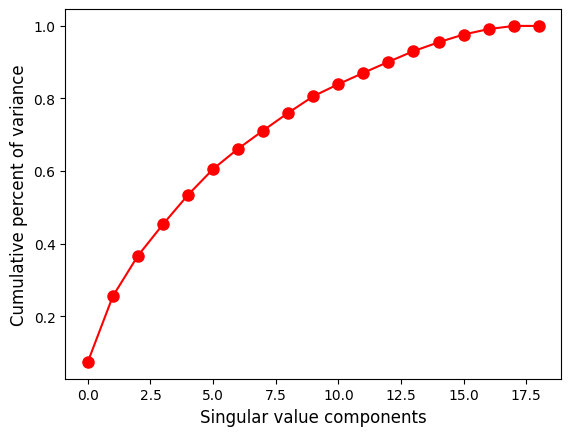

In [59]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
svd = TruncatedSVD(n_components=19)
latent_matrix = svd.fit_transform(tfidf_df)
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)
plt.show()

In [60]:
n = 20
latent_matrix_1_df = pd.DataFrame(latent_matrix[:,0:n], index=df_movies.title.tolist())

In [61]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200)
latent_matrix_2 = svd.fit_transform(user_movies_data)
index_to_use = df_movies.iloc[:len(latent_matrix_2)].title.tolist()
latent_matrix_2_df = pd.DataFrame(
                             latent_matrix_2, index=index_to_use)

In [62]:
latent_matrix_2_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Toy Story (1995),37.649828,-6.380094,-14.994617,-0.286947,1.887147,-4.790050,-8.807629,-2.198636,-1.153304,-1.387562,...,1.791621,-2.373964,0.844674,0.652843,0.848860,-0.165671,-0.884613,1.155310,-1.235717,-1.713462
Jumanji (1995),20.596193,-0.477880,-10.865916,8.635795,3.072411,0.517149,-4.359215,-3.821408,3.394116,-0.236474,...,-0.875605,-0.773853,-0.422306,0.029820,0.507387,-0.038823,1.896180,0.323205,1.244297,-0.521055
Grumpier Old Men (1995),8.504182,-5.714924,-3.441693,6.382810,-0.024162,0.783433,1.423027,-0.542292,-3.270654,-1.897237,...,0.186708,0.055856,-0.543978,-0.464108,0.134988,-1.361580,-0.136623,-0.162722,-0.466284,0.937290
Waiting to Exhale (1995),0.465720,-0.828101,-0.954583,0.239080,0.735695,0.877414,-0.214720,-0.527368,-0.079467,-0.015616,...,0.066452,-0.188277,-0.000732,-0.117800,-0.518714,0.183026,-0.147161,-0.031339,0.020042,-0.283694
Father of the Bride Part II (1995),6.071045,-2.673536,-4.698195,4.415807,3.714221,1.673627,-1.297653,-1.308023,-1.325735,-1.229592,...,1.223574,-0.204735,-0.123114,-0.067334,0.190809,0.213552,-0.564174,0.692431,-0.752861,0.491762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Spiral (2018),0.039507,0.157924,0.019030,-0.009546,-0.024836,0.164105,-0.182753,0.071143,-0.009693,0.046211,...,-0.064740,0.185216,0.127130,-0.336123,0.341811,0.092918,0.360773,0.122021,-0.485682,-0.580373
Mission: Impossible - Fallout (2018),0.034568,0.138184,0.016651,-0.008353,-0.021732,0.143591,-0.159909,0.062250,-0.008481,0.040435,...,-0.056648,0.162064,0.111239,-0.294107,0.299084,0.081303,0.315676,0.106768,-0.424972,-0.507827
SuperFly (2018),0.034568,0.138184,0.016651,-0.008353,-0.021732,0.143591,-0.159909,0.062250,-0.008481,0.040435,...,-0.056648,0.162064,0.111239,-0.294107,0.299084,0.081303,0.315676,0.106768,-0.424972,-0.507827
Iron Soldier (2010),0.034568,0.138184,0.016651,-0.008353,-0.021732,0.143591,-0.159909,0.062250,-0.008481,0.040435,...,-0.056648,0.162064,0.111239,-0.294107,0.299084,0.081303,0.315676,0.106768,-0.424972,-0.507827


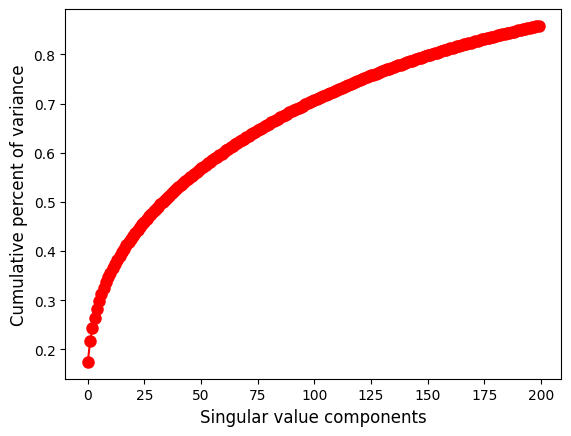

In [63]:
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)
plt.show()

In [64]:
from sklearn.metrics.pairwise import cosine_similarity
# take the latent vectors for a selected movie from both content
# and collaborative matrixes
common_index = latent_matrix_1_df.index.intersection(latent_matrix_2_df.index)
latent_matrix_1_df = latent_matrix_1_df.loc[common_index]
latent_matrix_2_df = latent_matrix_2_df.loc[common_index]

a_1 = np.array(latent_matrix_1_df.loc['Toy Story (1995)']).reshape(1, -1)
a_2 = np.array(latent_matrix_2_df.loc["Toy Story (1995)"]).reshape(1, -1)

# calculate the similartity of this movie with the others in the list
score_1 = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
score_2 = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)

# an average measure of both content and collaborative
hybrid = ((score_1 + score_2)/2.0)

# form a data frame of similar movies
dictDf = {'content': score_1 , 'collaborative': score_2, 'hybrid': hybrid}
# dictDf = {'collaborative': score_2}
similar = pd.DataFrame(dictDf, index = latent_matrix_2_df.index )

#sort it on the basis of either: content, collaborative or hybrid,
# here : content
similar.sort_values('content', ascending=False, inplace=True)

similar[1:].head(11)

,content,collaborative,hybrid
"Tale of Despereaux, The (2008)",1.0,0.279567,0.639784
Shrek Forever After (a.k.a. Shrek: The Final Chapter) (2010),1.0,0.162635,0.581318
Toy Story 3 (2010),1.0,0.355638,0.677819
"Emperor's New Groove, The (2000)",1.0,0.149810,0.574905
Turbo (2013),1.0,0.200170,0.600085
"Adventures of Rocky and Bullwinkle, The (2000)",1.0,0.075826,0.537913
"Monsters, Inc. (2001)",1.0,0.101611,0.550805
Toy Story 2 (1999),1.0,0.098503,0.549252
The Good Dinosaur (2015),1.0,-0.007571,0.496214
"Wild, The (2006)",1.0,0.053932,0.526966


In [65]:
similar.sort_values('collaborative', ascending=False, inplace=True)

similar[1:].head(11)

,content,collaborative,hybrid
'night Mother (1986),-3.506066e-16,0.640401,0.320201
Independence Day (a.k.a. ID4) (1996),1.888812e-01,0.624198,0.406540
Jurassic Park (1993),1.888812e-01,0.617804,0.403342
Mission: Impossible (1996),2.056237e-01,0.605701,0.405662
Star Wars: Episode IV - A New Hope (1977),2.053904e-01,0.594628,0.400009
Rififi (Du rififi chez les hommes) (1955),-1.214306e-17,0.587089,0.293545
Once Upon a Time in the West (C'era una volta il West) (1968),8.245358e-17,0.585226,0.292613
"Lion King, The (1994)",6.583716e-01,0.582450,0.620411
Forrest Gump (1994),9.110691e-02,0.580899,0.336003
Aladdin (1992),7.227832e-01,0.573914,0.648349


In [66]:
similar.sort_values('hybrid', ascending=False, inplace=True)

similar[1:].head(11)

,content,collaborative,hybrid
Toy Story 3 (2010),1.000000,0.355638,0.677819
Madagascar (2005),0.875626,0.443366,0.659496
Space Jam (1996),0.842798,0.463277,0.653037
"Rugrats Movie, The (1998)",0.770039,0.533164,0.651602
Aladdin (1992),0.722783,0.573914,0.648349
Jumanji (1995),0.813578,0.469732,0.641655
"Tale of Despereaux, The (2008)",1.000000,0.279567,0.639784
Curious George (2006),0.875626,0.402080,0.638853
Jimmy Neutron: Boy Genius (2001),0.875626,0.398615,0.637120
James and the Giant Peach (1996),0.818376,0.453826,0.636101


In [67]:
def recommend_similar_movies(title):
    # take the latent vectors for a selected movie from both content
    # and collaborative matrixes
    a_1 = np.array(latent_matrix_1_df.loc[title]).reshape(1, -1)
    a_2 = np.array(latent_matrix_2_df.loc[title]).reshape(1, -1)

    # calculate the similartity of this movie with the others in the list
    score_1 = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
    score_2 = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)

    # an average measure of both content and collaborative
    hybrid = ((score_1 + score_2)/2.0)

    # form a data frame of similar movies
    dictDf = {'content': score_1 , 'collaborative': score_2, 'hybrid': hybrid}
    similar = pd.DataFrame(dictDf, index = latent_matrix_2_df.index )

    #sort it on the basis of either: content, collaborative or hybrid
    similar.sort_values('hybrid', ascending=False, inplace=True)

    print(similar[1:].head(11))

In [68]:
recommend_similar_movies("Toy Story (1995)")

                                   content  collaborative    hybrid
Toy Story 3 (2010)                1.000000       0.355638  0.677819
Madagascar (2005)                 0.875626       0.443366  0.659496
Space Jam (1996)                  0.842798       0.463277  0.653037
Rugrats Movie, The (1998)         0.770039       0.533164  0.651602
Aladdin (1992)                    0.722783       0.573914  0.648349
Jumanji (1995)                    0.813578       0.469732  0.641655
Tale of Despereaux, The (2008)    1.000000       0.279567  0.639784
Curious George (2006)             0.875626       0.402080  0.638853
Jimmy Neutron: Boy Genius (2001)  0.875626       0.398615  0.637120
James and the Giant Peach (1996)  0.818376       0.453826  0.636101
Lion King, The (1994)             0.658372       0.582450  0.620411


In [69]:
recommend_similar_movies("Mission: Impossible (1996)")

                                       content  collaborative    hybrid
Rock, The (1996)                      0.783587       0.647721  0.715654
GoldenEye (1995)                      0.783587       0.622666  0.703126
Broken Arrow (1996)                   0.783587       0.599058  0.691322
Twister (1996)                        0.677494       0.678242  0.677868
Independence Day (a.k.a. ID4) (1996)  0.564014       0.755351  0.659683
Executive Decision (1996)             0.783587       0.498004  0.640795
Seven (a.k.a. Se7en) (1995)           0.754226       0.518531  0.636378
Diva (1981)                           0.738591       0.494210  0.616401
Cliffhanger (1993)                    0.783587       0.443403  0.613495
Jurassic Park (1993)                  0.564014       0.648115  0.606064
True Lies (1994)                      0.639578       0.571824  0.605701


In [70]:
recommend_similar_movies("Jurassic Park (1993)")

                                                     content  collaborative  \
Independence Day (a.k.a. ID4) (1996)                1.000000       0.703956   
Terminator 2: Judgment Day (1991)                   0.800240       0.775083   
Stargate (1994)                                     0.919620       0.626475   
Waterworld (1995)                                   0.919620       0.610294   
Star Wars: Episode IV - A New Hope (1977)           0.919620       0.597802   
Black Mask (Hak hap) (1996)                         0.908194       0.534423   
Demolition Man (1993)                               0.919620       0.508925   
Star Wars: Episode V - The Empire Strikes Back ...  0.919620       0.485750   
Outbreak (1995)                                     0.853537       0.532429   
Logan's Run (1976)                                  0.919620       0.454643   
Blade Runner (1982)                                 0.891449       0.481001   

                                                   